In [1]:
# takes a simple graph, return a list of edges of a multigraph
def graphToMultigraph(g):
    for i in range(g.num_verts()):
        if min(g.neighbors(i)) < i:
            break
    edges = []
    for j in range(i,g.num_verts()):
        edges.append(g.neighbors(j))
    return edges

# takes a g6 string, return a multigraph object
def g6ToMultigraph(g6):
    g = Graph(multiedges=True, loops=True)
    g.add_edges(graphToMultigraph(Graph(g6)))
    return g

# plot a list of g6 graphs with tutte polynomial as the title
def plotGraphsFromG6(g6s):
    for g6 in g6s:
        print(g6)
        g, tp = multigraphG6TuttePolynomial(g6)
        g.plot(title = tp).show()
        
def multigraphG6TuttePolynomial(g6):
    g = g6ToMultigraph(g6)
    return g, g.tutte_polynomial()

In [2]:
# load database as read only
path = !pwd
path = path[0] + "/TP.db"
D=SQLDatabase(path, read_only=True)

UNIQ = 0           # tutte unique
ONE_CUT=1          # non-unique with 1 cut
TWO_CUT_TWST=2     # non-unique with 2 cut and whitney twist
TWO_CUT_NON_TWST=3 # non-unique with 2 cut but no whiney twist
TRI_CUT=4          #  non-unique and triconnected
labels_d = {UNIQ : "tutte unique",
          ONE_CUT : "non-unique with 1 cut",
          TWO_CUT_TWST : "non-unique with 2 cut and whitney twist",
          TWO_CUT_NON_TWST : "non-unique with 2 cut but no whiney twist",
          TRI_CUT : "non-unique and triconnected"}

In [3]:
D.get_skeleton()

{'TP': {'graph6': {'sql': 'TEXT',
   'primary_key': True,
   'index': True,
   'unique': True},
  'vertices': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False},
  'edges': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False},
  'connectivity': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False},
  'tutte_polynomial': {'sql': 'TEXT',
   'primary_key': False,
   'index': False,
   'unique': False},
  'label': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False},
  'del_cards': {'sql': 'TEXT',
   'primary_key': False,
   'index': False,
   'unique': False},
  'con_cards': {'sql': 'TEXT',
   'primary_key': False,
   'index': False,
   'unique': False},
  'n_deck': {'sql': 'INTEGER',
   'primary_key': False,
   'index': False,
   'unique': False}}}

In [4]:
# number of tutte unique graphs, non-unique with 1 cut, non-unique with whitney twist, etc
cur = D.get_cursor()
for label in labels_d:
    print(labels_d[label])
    for m in range(1, 15):
        q = f"select count(*) from TP where label={label} and edges={m}"
        print("m="+str(m), cur.execute(q).fetchall()[0][0])

tutte unique
m=1 1
m=2 1
m=3 2
m=4 3
m=5 6
m=6 12
m=7 24
m=8 52
m=9 128
m=10 331
m=11 941
m=12 3014
m=13 10676
m=14 41966
non-unique with 1 cut
m=1 0
m=2 1
m=3 3
m=4 9
m=5 27
m=6 89
m=7 301
m=8 1093
m=9 4163
m=10 16634
m=11 69342
m=12 300818
m=13 1352392
m=14 6287288
non-unique with 2 cut and whitney twist
m=1 0
m=2 0
m=3 0
m=4 0
m=5 0
m=6 2
m=7 8
m=8 38
m=9 151
m=10 611
m=11 2520
m=12 10716
m=13 46869
m=14 211917
non-unique with 2 cut but no whiney twist
m=1 0
m=2 0
m=3 0
m=4 0
m=5 0
m=6 0
m=7 0
m=8 0
m=9 0
m=10 0
m=11 7
m=12 38
m=13 175
m=14 669
non-unique and triconnected
m=1 0
m=2 0
m=3 0
m=4 0
m=5 0
m=6 0
m=7 0
m=8 0
m=9 0
m=10 0
m=11 0
m=12 9
m=13 27
m=14 119


In [27]:
# return a list of graphs match tp
def get_graphs_by_tp(tp):
    q = f"select graph6 from TP where tutte_polynomial='{tp}'"
    cur = D.get_cursor()
    return [i[0] for i in cur.execute(q).fetchall()]

# get tutte equivalent graphs
def get_tutte_eq_graphs(g6):
    g, tp = multigraphG6TuttePolynomial(g6)
    return get_graphs_by_tp(tp)

In [52]:
q = f"select count(*) from TP where n_deck>0 and label={UNIQ}"
print("tutte unique and has deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck=0 and label={UNIQ}"
print("tutte unique but has no deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck>0 and label!={UNIQ}"
print("non tutte unique but has deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck=0 and label!={UNIQ}"
print("non tutte unique and has no deck")
print(cur.execute(q).fetchall())

tutte unique and has deck
[(26582,)]
tutte unique but has no deck
[(30574,)]
non tutte unique but has deck
[(136,)]
non tutte unique and has no deck
[(8305900,)]


In [ ]:
q = f"select count(*) from TP where n_deck=1"
print("unique deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck=1 and label={UNIQ}"
print("unique deck and tutte unique")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck=1 and label!={UNIQ}"
print("unique deck but not tutte unique")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck!=1 and label={UNIQ}"
print("tutte unique but not deck unique")
print(cur.execute(q).fetchall())

In [ ]:
q = f"select count(*) from TP where n_deck > 1 and label={UNIQ}"
print("tutte unique but more than 1 deck")
print(cur.execute(q).fetchall())

q = f"select count(*) from TP where n_deck = 0 and label={UNIQ}"
print("tutte unique but not 0 deck")
print(cur.execute(q).fetchall())

In [ ]:
q = f"select graph6 from TP where n_deck=1 and label!={UNIQ}"
print("unique deck but not tutte unique")
ud_no_tu = [item[0] for item in cur.execute(q).fetchall()] # 30 graphs

In [6]:
q = f"select del_cards, con_cards from TP where n_deck=1 and label!={UNIQ}"
print("unique deck but not tutte unique")
result = cur.execute(q).fetchall() # 30 graphs

unique deck but not tutte unique


In [3]:
q = f"select tutte_polynomial, graph6 from TP where label={UNIQ}"
cur = D.get_cursor()
result = cur.execute(q).fetchall()
TU_D = {poly: g for (poly, g) in result}

# if g is a tutte unique graph, return its g6 string, else return an empty string
def get_unique_str(g):
    n_loops = g.number_of_loops()
    if n_loops == g.num_edges(): # if all edges are loops
        if n_loops == 0:
            return ""
        return str(n_loops) + "_loops"
    if n_loops > 0: # if g has loops, but not all edges, g is not tutte unique
        return ""
    tp = str(g.tutte_polynomial())
    if tp in TU_D: # g is tutte unique, return g6 string
        return TU_D[tp]
    else:
        return ""

def get_deck(g6):
    if isinstance(g6, str):
        g = g6ToMultigraph(g6)
    else:
        g = g6
        g.allow_multiple_edges(True)
        
    g_del = []
    g_ctc = []
    for e in g.edges():
        cp = Graph(g)
        if g.is_cut_edge(e): # if e is a bridge
            g_del.append("")
        else:        
            cp.delete_edge(e)
            g_del.append(get_unique_str(cp))
            cp.add_edge(e)
            
        cp.contract_edge(e)
        g_ctc.append(get_unique_str(cp))
    return g_del, g_ctc

In [6]:
def to_unique_deck(del_cards, con_cards):
    result_deck = []
    for i in range(len(del_cards)):
        if not del_cards[i] and con_cards[i]:
            result_deck.append(con_cards[i])
        elif not con_cards[i] and del_cards[i]:
            result_deck.append(del_cards[i])
        elif (con_cards[i] and del_cards[i]) or not (con_cards[i] and del_cards[i]):
            raise ValueError 
    return result_deck

In [ ]:
def missing_card(del_cards, con_cards):
    missing_idx = []
    for i in range(len(del_cards)):
        if not del_cards[i] and not con_cards[i]:
            missing_idx.append(i)
    return missing_idx

In [ ]:
cur = D.get_cursor()
q = f"select graph6, del_cards, con_cards from TP where label={UNIQ} and n_deck=1"
result = cur.execute(q).fetchall()

In [4]:
def get_n_deck(g_del, g_ctc):
    n = 1
    for i in range(len(g_del)):
        if not g_del[i] and not g_ctc[i]:
            return 0
        if g_del[i] and g_ctc[i]:
            n = n * 2
    return n

def to_unique_deck(del_cards, con_cards):
    assert isinstance(del_cards, list)
    result_deck = []
    for i in range(len(del_cards)):
        if not del_cards[i] and con_cards[i]:
            result_deck.append(con_cards[i])
        elif not con_cards[i] and del_cards[i]:
            result_deck.append(del_cards[i])
        elif (con_cards[i] and del_cards[i]):
            raise ValueError(f"not unique deck, repeted card at index {i}, {del_cards} {con_cards}")
        elif not (con_cards[i] and del_cards[i]):
            raise ValueError(f"no deck exists, missing card at index {i}")
    return result_deck

# given a deck check if it is one of the combination of del_cards and con_cards
# del_cards = [1,2,3] con_cards=[4,5,6] deck=[5,6,1], return True
# del_cards = [1,2,3] con_cards=[4,5,6] deck=[1,4,5], return False
def check_deck(del_cards, con_cards, deck_to_check):
    assert len(del_cards) == len(deck_to_check)
    
    for card in deck_to_check:
        if card in del_cards:
            idx = del_cards.index(card) #  index of first occurrence of del_card
            del_cards.pop(idx)
            con_cards.pop(idx)
        elif card in con_cards:
            idx = con_cards.index(card) #  index of first occurrence of del_card
            del_cards.pop(idx)
            con_cards.pop(idx)
        else:
            return False
    return True

assert check_deck([1,2,2], [4,5,5], [2,2,5]) == False
assert check_deck([1,2,3], [4,5,6], [1,2,4]) == False
assert check_deck([1,2,3], [4,5,6], [1,2,6]) == True
assert check_deck([1,1,1], [0,0,0], [1,1,1]) == True

# fixed_ends=['a', 'b', 'c']
# new_ends=[1, 2]
# all_combinations = 
# [[('a', 1), ('b', 1), ('c', 1)],
#  [('a', 1), ('b', 1), ('c', 2)],
#  [('a', 1), ('b', 2), ('c', 1)],
#  [('a', 1), ('b', 2), ('c', 2)],
#  [('a', 2), ('b', 1), ('c', 1)],
#  [('a', 2), ('b', 1), ('c', 2)],
#  [('a', 2), ('b', 2), ('c', 1)],
#  [('a', 2), ('b', 2), ('c', 2)]]

def get_all_combinations(fixed_ends, new_ends, new_edges, all_combinations):
    if not fixed_ends:
        all_combinations.append(new_edges)
        return

    for n_end in new_ends:
        get_all_combinations(fixed_ends[1:], new_ends, new_edges+[(fixed_ends[0], n_end)], all_combinations)
    return all_combinations
            
    
# split vertex v into two vertices
# return a list of non-isomorphic biconnected graphs
def reverse_contract(g):
    processed_graphs = []
    w = g.num_verts() # the new vertex
    
    for v in g.vertices():
        old_edges = g.edges_incident(v) # edges incident to v needs to chose between v and w
        fixed_ends = [e[0] if e[0]!=v else e[1] for e in old_edges]
        new_g = Graph(g)
        new_g.delete_edges(old_edges)
        new_g.add_edge(v, w)

        all_combinations = get_all_combinations(fixed_ends, [v, w], [], [])
        
        for edges in all_combinations[1:-1]: # ignore first one and last one, they are one-connected
            new_g.add_edges(edges)
            add_to(new_g, processed_graphs)
            new_g.delete_edges(edges)
    return processed_graphs

# check if new_g is non-isomprhic to any graphs in result
# add it to result if it is
def add_to(new_g, result):
    repeated = False
    for g in result:
        if new_g.is_isomorphic(g):
            repeated = True
            break
    if not repeated:
        result.append(Graph(new_g))
        
# given a deck of card and num_verts of result graph
# find the graphs that has the deck as its deck
def deckToGraph(deck, n): # explore one card only
    deck.sort() # sort for comparison
    deck_g = [g6ToMultigraph(g6) for g6 in set(deck)] # avoid calculating isomorphic cards
    cards_n = [g.order() for g in deck_g] # the number of vertices of each unique card
    result = []
        
    # DELETION CARDS
    del_indices = [i for i, x in enumerate(cards_n) if x == n] # indices of unique deletion cards
    
    if len(del_indices) > 0:
        del_card_g = Graph(deck_g[del_indices[0]]) # pick a del_card graph and make a copy
        del_card_vertices = del_card_g.vertices() # list of vertices

        for i in range(n-1):
            for j in range(i+1, n):
                u, v = (del_card_vertices[i], del_card_vertices[j])
                del_card_g.add_edge((u, v)) # add edge
                d, c = get_deck(del_card_g)
                if get_n_deck(d, c) == 1:
                    deck_to_check = to_unique_deck(d, c)
                    deck_to_check.sort()
                    if (deck_to_check == deck):
                        add_to(del_card_g, result)
                elif check_deck(d, c, deck):
                    add_to(del_card_g, result)
                del_card_g.delete_edge(u, v) # delete added edge
    if len(result) > 0:
        return result
                
    # CONTRACTION CARDS
    con_indices = [i for i, x in enumerate(cards_n) if x == n-1] # indices of unique contraction cards
    if len(con_indices) > 0:
        reverse_contract_graphs = reverse_contract(Graph(deck_g[0]))
        for rcg in reverse_contract_graphs:
            d, c = get_deck(rcg)
            if get_n_deck(d, c) == 1:
                deck_to_check = to_unique_deck(d, c)
                deck_to_check.sort()
                if (deck_to_check == deck):
                    add_to(rcg, result)
            elif check_deck(d, c, deck):
                    add_to(rcg, result)
    return result


def deckToGraphAll(deck): # explore all cards
    deck.sort() # sort for comparison
    deck_g = [g6ToMultigraph(g6) for g6 in set(deck)] # avoid calculating isomorphic cards
    cards_n = [g.order() for g in deck_g] # the number of vertices of each unique card
    result = []
    
    uniq_cards_n = list(set(cards_n))
    uniq_cards_n.sort()

    if len(uniq_cards_n) == 2: # we can distinguish a card is a del_card or a con_card
        con_n, del_n = uniq_cards_n
        assert del_n == con_n + 1 # |V| of a con_card is 1 smaller than |V| of a del_card
    else: # all the cards having same num_verts
        con_n = uniq_cards_n[0]
        del_n = uniq_cards_n[0]
        
    # DELETION CARDS
    del_indices = [i for i, x in enumerate(cards_n) if x == del_n] # indices of unique deletion cards
    for del_index in del_indices:
        del_card_g = Graph(deck_g[del_index]) # pick a del_card graph and make a copy
        del_card_vertices = del_card_g.vertices()

        for i in range(del_n-1):
            for j in range(i+1, del_n):
                u, v = (del_card_vertices[i], del_card_vertices[j])
                del_card_g.add_edge((u, v)) # add edge
                d, c = get_deck(del_card_g)
                if get_n_deck(d, c) == 1:
                    deck_to_check = to_unique_deck(d, c)
                    deck_to_check.sort()
                    if (deck_to_check == deck):
                        add_to(del_card_g, result)
                elif check_deck(d, c, deck):
                    add_to(del_card_g, result)
                del_card_g.delete_edge(u, v) # delete added edge
    # CONTRACTION CARDS
    con_indices = [i for i, x in enumerate(cards_n) if x == con_n] # indices of unique deletion cards
    for con_index in con_indices:
        reverse_contract_graphs = reverse_contract(Graph(deck_g[con_index]))
        for rcg in reverse_contract_graphs:
            d, c = get_deck(rcg)
            if get_n_deck(d, c) == 1:
                deck_to_check = to_unique_deck(d, c)
                deck_to_check.sort()
                if (deck_to_check == deck):
                    add_to(rcg, result)
            elif check_deck(d, c, deck):
                    add_to(rcg, result)
    return result

In [5]:
# if n_deck>0 return a deck
def to_deck(del_cards, con_cards):
    deck = []
    for i, d_card in enumerate(del_cards):
        if d_card:
            deck.append(d_card)
        elif con_cards[i]:
            deck.append(con_cards[i])
        else:
            raise ValueError(f"no deck exists, missing card at index {i}")
    return deck



In [6]:
q = f"select graph6, connectivity, label from TP where n_deck=1 and label!={UNIQ}"
result = cur.execute(q).fetchall()

In [7]:
len(result)

30

connectivity=1
Edges: [(0, 1), (0, 2)]
non-unique with 1 cut
DEg


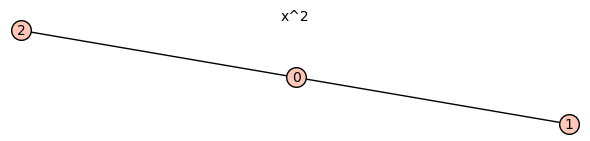

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 2), (1, 3), (2, 3)]
non-unique with 2 cut and whitney twist
I?rDD@OK?


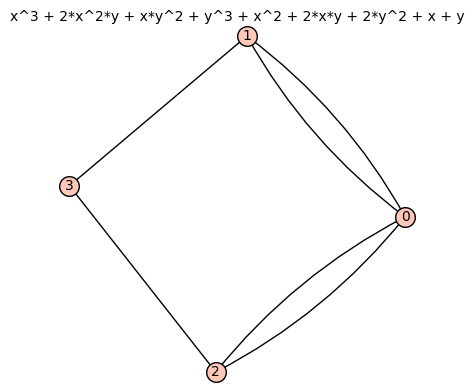

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (1, 3), (2, 3), (2, 3)]
non-unique with 2 cut and whitney twist
I?rDA_oK?


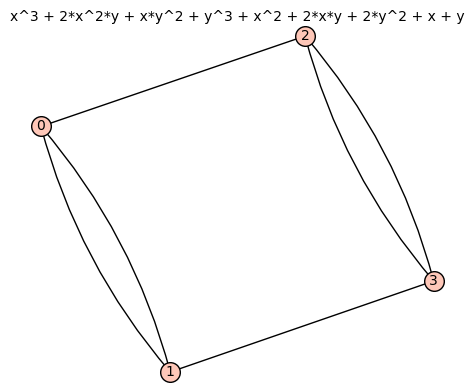

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (2, 4), (3, 4), (4, 5)]
non-unique with 2 cut but no whiney twist
P??EEA_WC_I?a?I?B?CG?B??


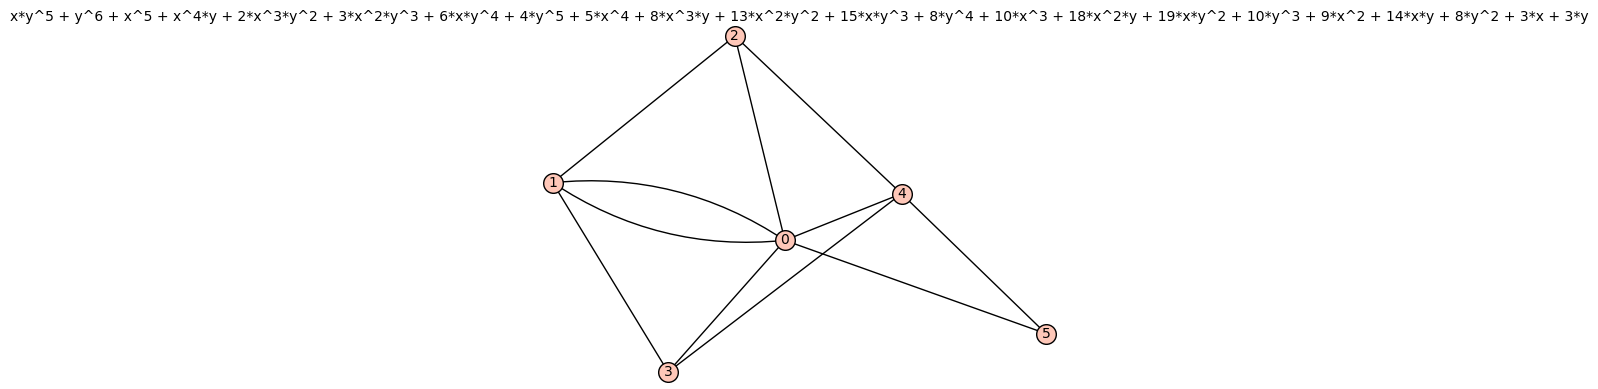

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (0, 4), (1, 3), (1, 4), (2, 5), (2, 6), (3, 5), (4, 6)]
non-unique with 2 cut but no whiney twist
R???EB?gD?Q?S?a?H?@G?D??a??S??


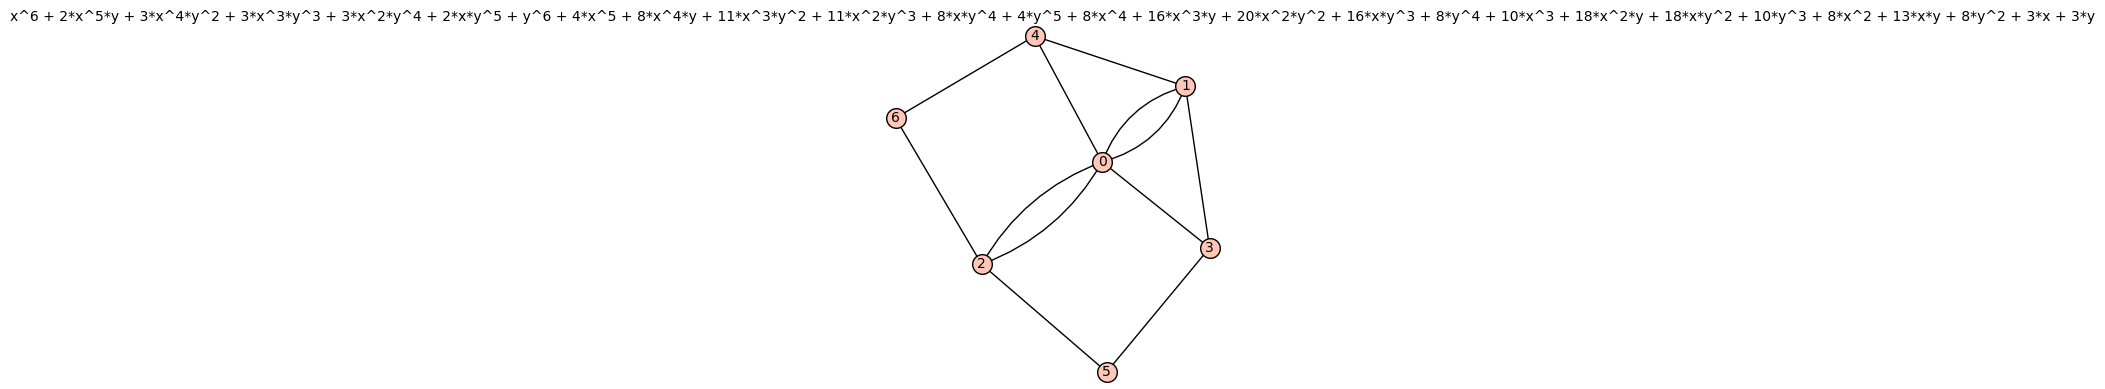

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (0, 4), (1, 3), (1, 5), (2, 4), (2, 5), (3, 6), (4, 6)]
non-unique with 2 cut but no whiney twist
R???EB?gD?Q?S?a?D?AG?H??Q??S??


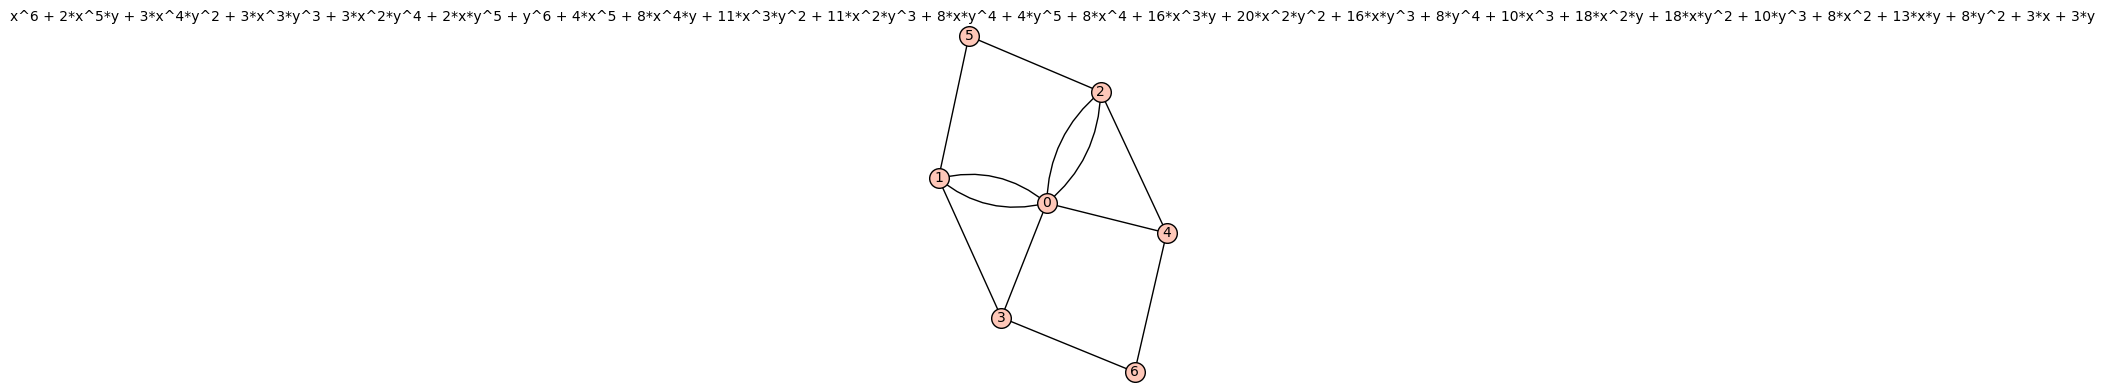

____________________
connectivity=2
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 5), (1, 6), (2, 5), (2, 7), (3, 6), (4, 8), (5, 8), (6, 7)]
non-unique with 2 cut but no whiney twist
T??????oD?Q?a?P?C_AC?C_?`??E??P??C_?


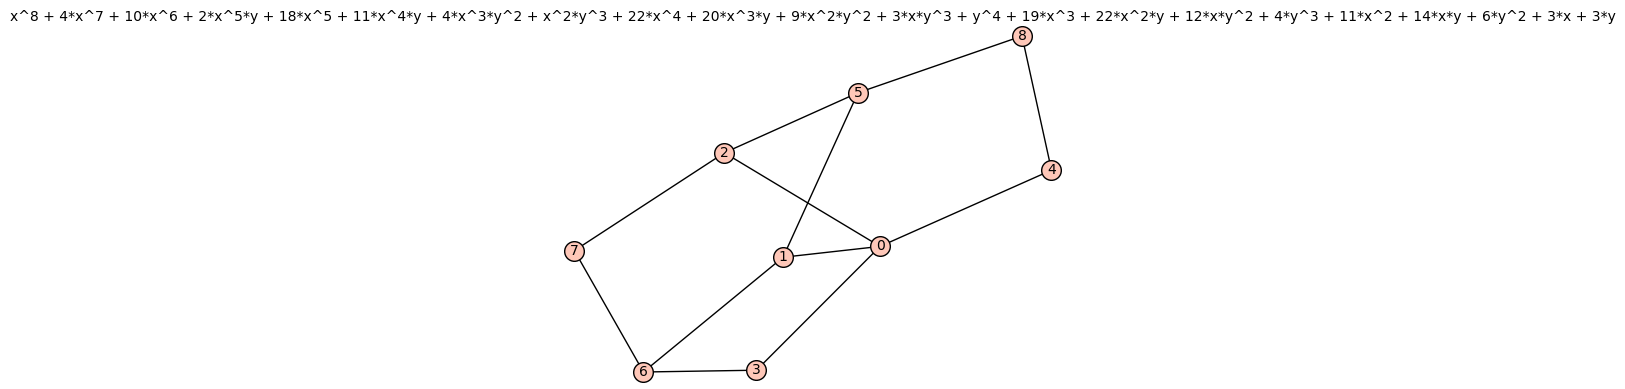

____________________
connectivity=2
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 5), (1, 6), (2, 5), (3, 7), (3, 8), (4, 7), (5, 7), (6, 8)]
non-unique with 2 cut but no whiney twist
T??????oD?Q?a?P?C_AC?CO?H??I??`??A_?


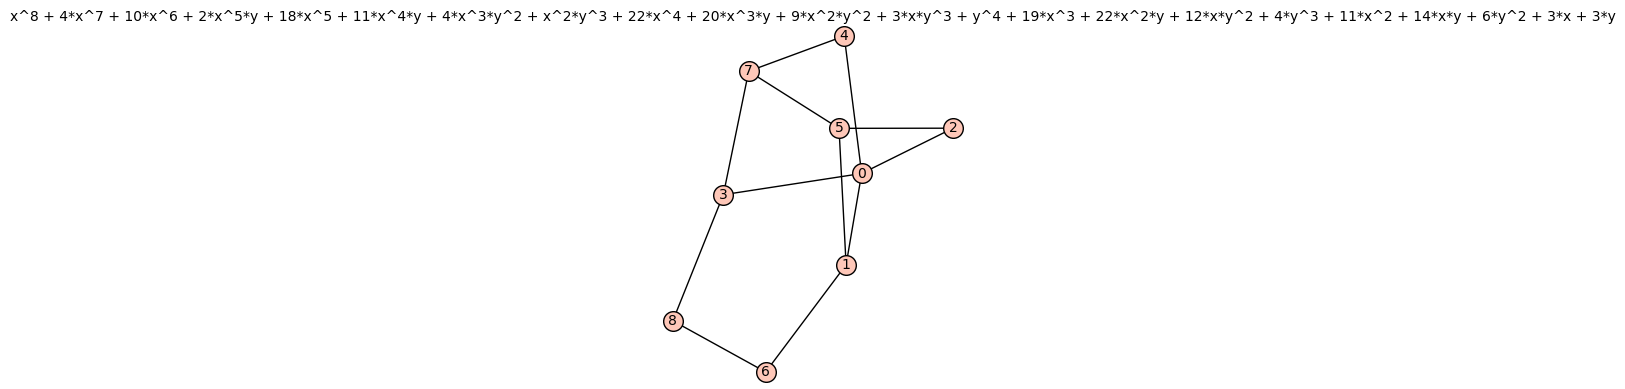

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5), (2, 3), (3, 4), (3, 4), (3, 5), (4, 6), (5, 6)]
non-unique with 2 cut but no whiney twist
S???EB?gB?Q?K?a?B??o?P??S??S??K??


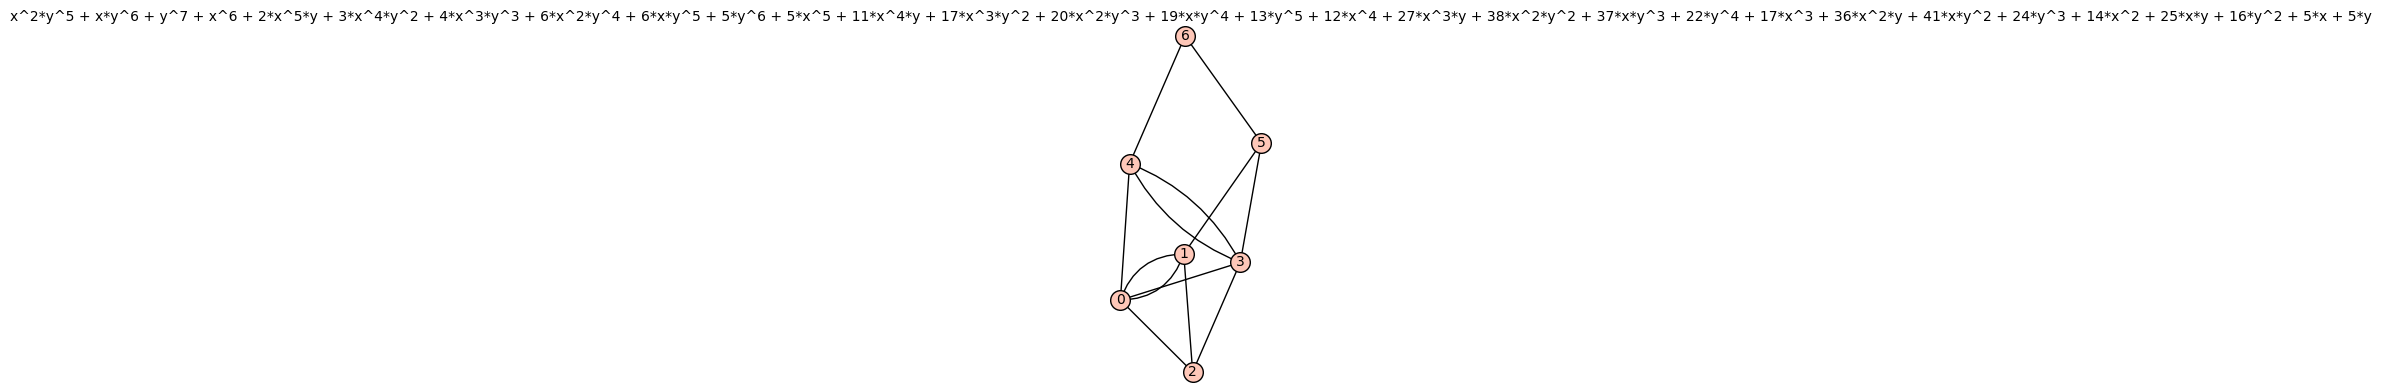

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5), (2, 3), (3, 5), (3, 5), (3, 6), (4, 6), (5, 6)]
non-unique with 2 cut but no whiney twist
S???EB?gB?Q?K?a?G_?g?D??Q??S??K??


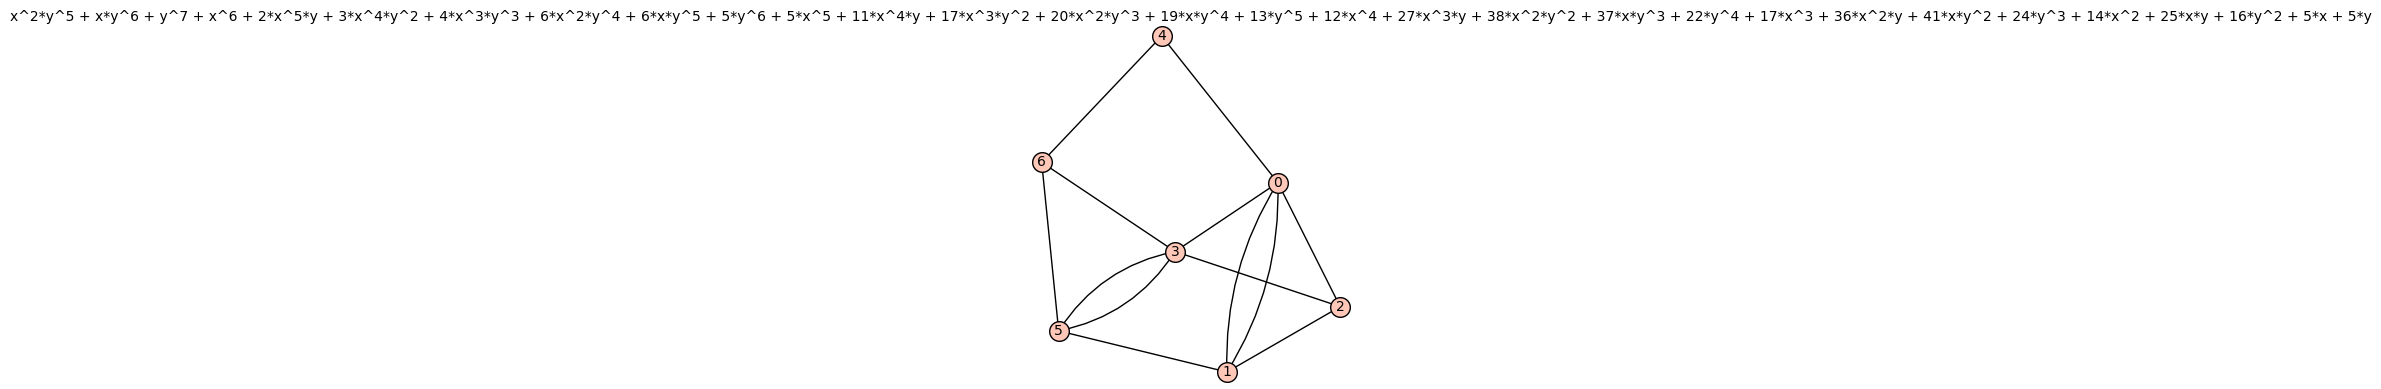

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (3, 4), (3, 7), (4, 6), (5, 7)]
non-unique with 2 cut but no whiney twist
T????B?oD?K?c?K?P??o?`?@A??S??a??D??


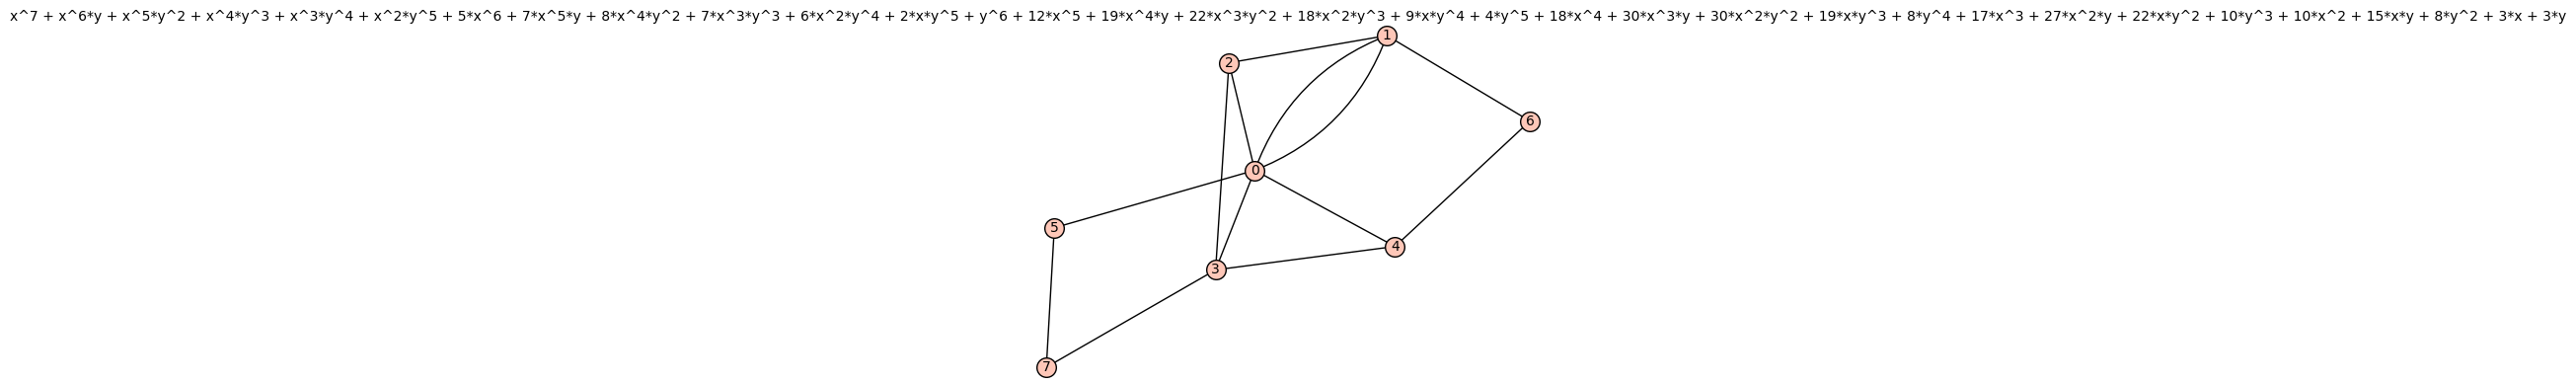

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5), (1, 6), (3, 4), (3, 5), (3, 6), (4, 7), (5, 7)]
non-unique with 2 cut but no whiney twist
T????B?oD?K?c?a?B?AG?D?@A??c??Q??D??


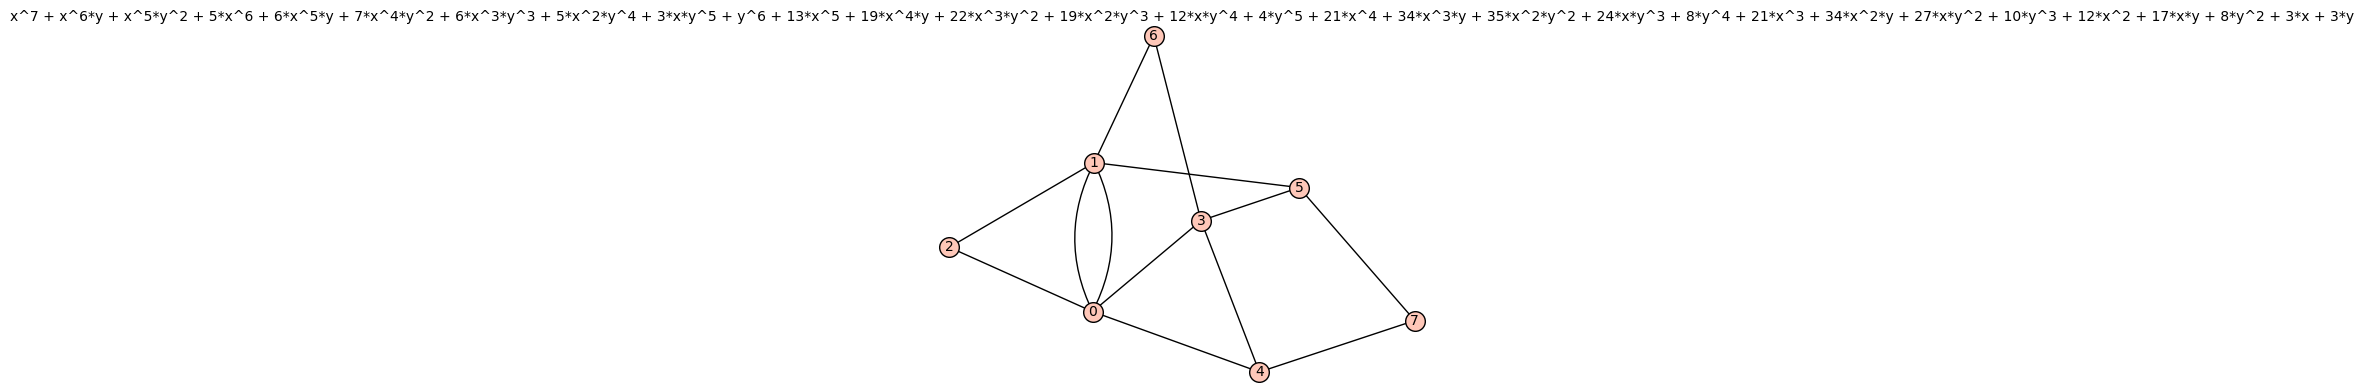

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 7), (6, 7)]
non-unique with 2 cut but no whiney twist
T????B?oD?K?c?a?B?AG?D??a??c??Q??B??


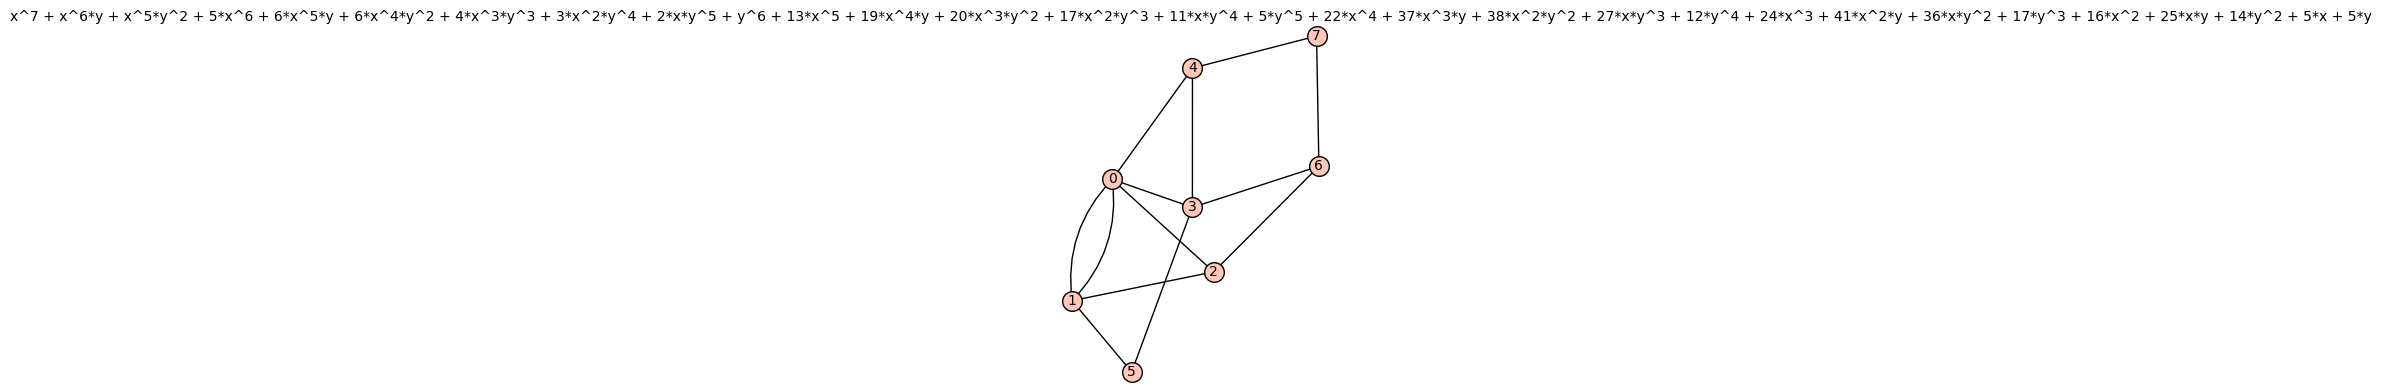

____________________
connectivity=2
Edges: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (2, 5), (3, 4), (3, 6), (3, 7), (4, 8), (5, 6), (6, 8), (7, 8)]
non-unique with 2 cut but no whiney twist
U??????oD?K?c?Q?B?@G?C_?E??a??P??A_??W??


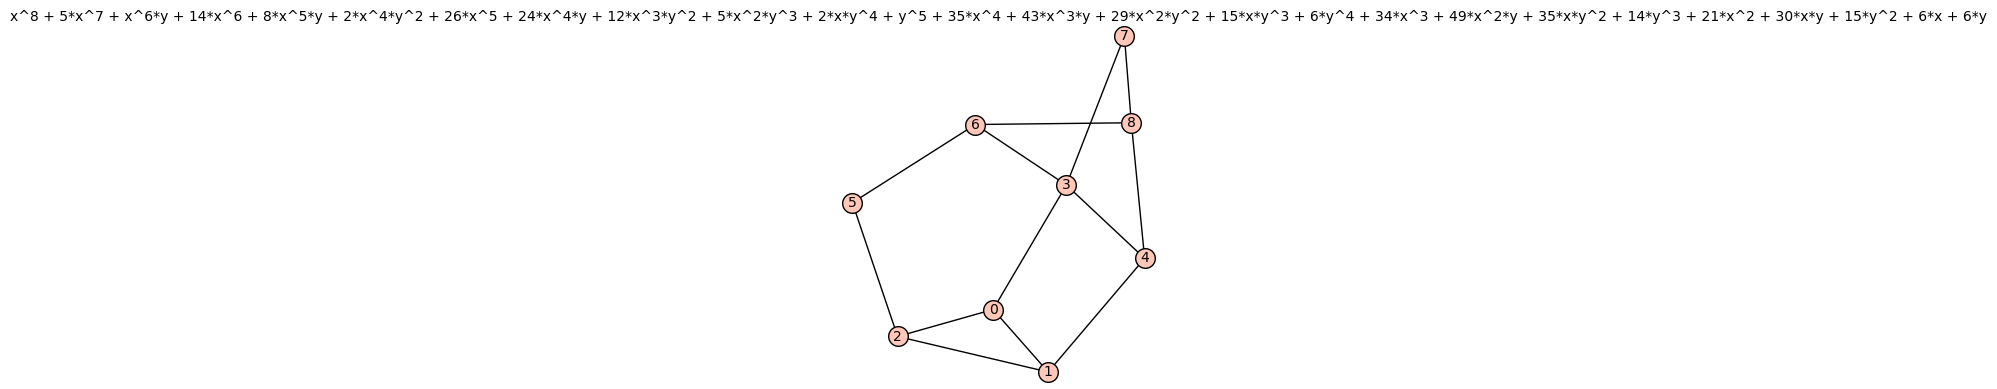

____________________
connectivity=2
Edges: [(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 4), (2, 6), (3, 7), (5, 6), (5, 8), (6, 9), (7, 8), (8, 9)]
non-unique with 2 cut but no whiney twist
V???????E?S?c?Q?D?AG?G_?E??a??H??@_??c??@_??


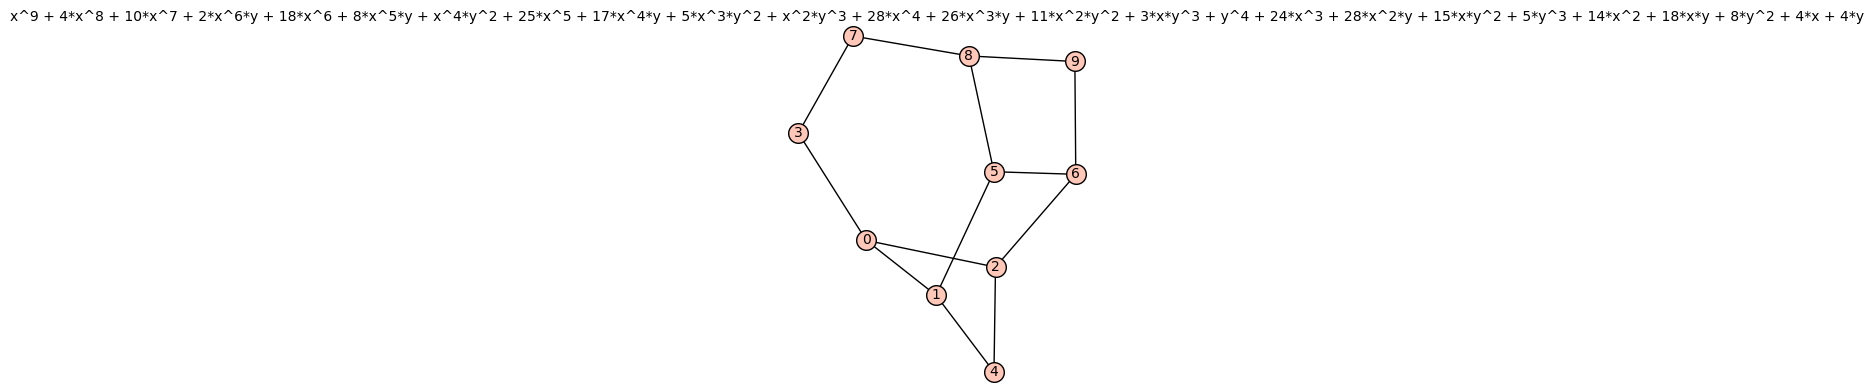

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 5), (2, 4), (2, 5), (2, 5), (4, 5)]
non-unique with 2 cut but no whiney twist
S??EEB?gD?K?c?S?P?@O?P??c?@G??W??


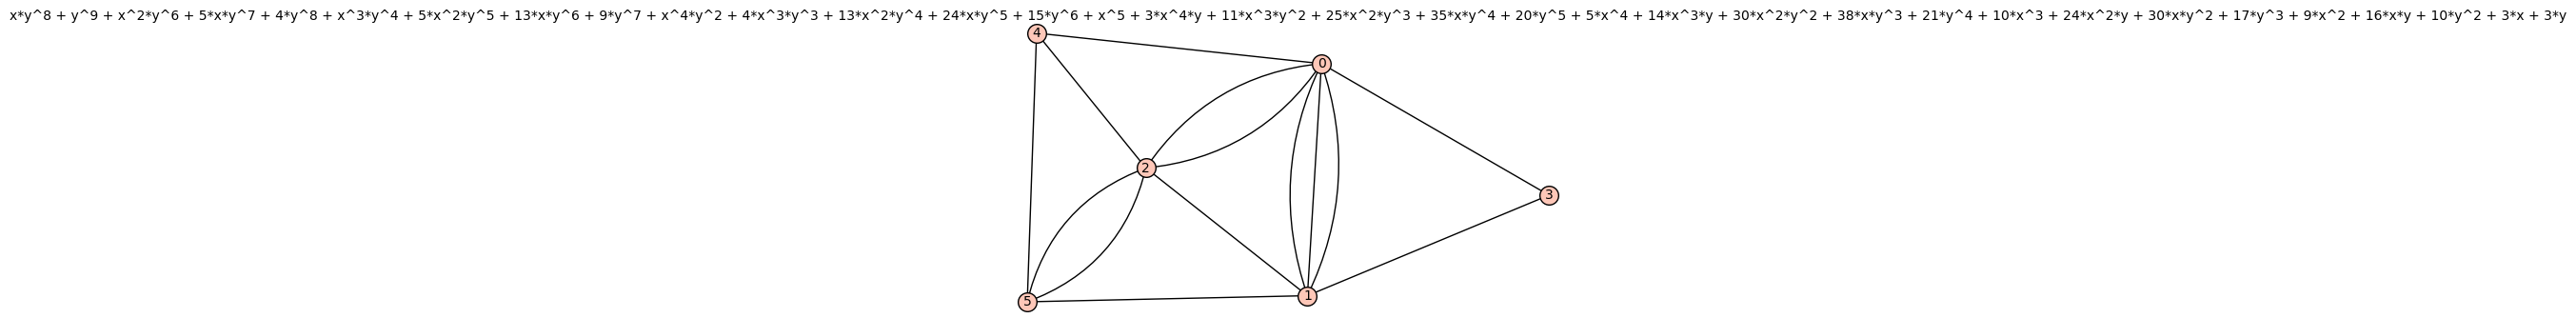

____________________
connectivity=3
Edges: [(0, 1), (0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 5), (3, 4), (3, 4), (3, 5), (4, 5)]
non-unique and triconnected
S??EEB?gD?K?c?S?P??o?E??c??g??W??


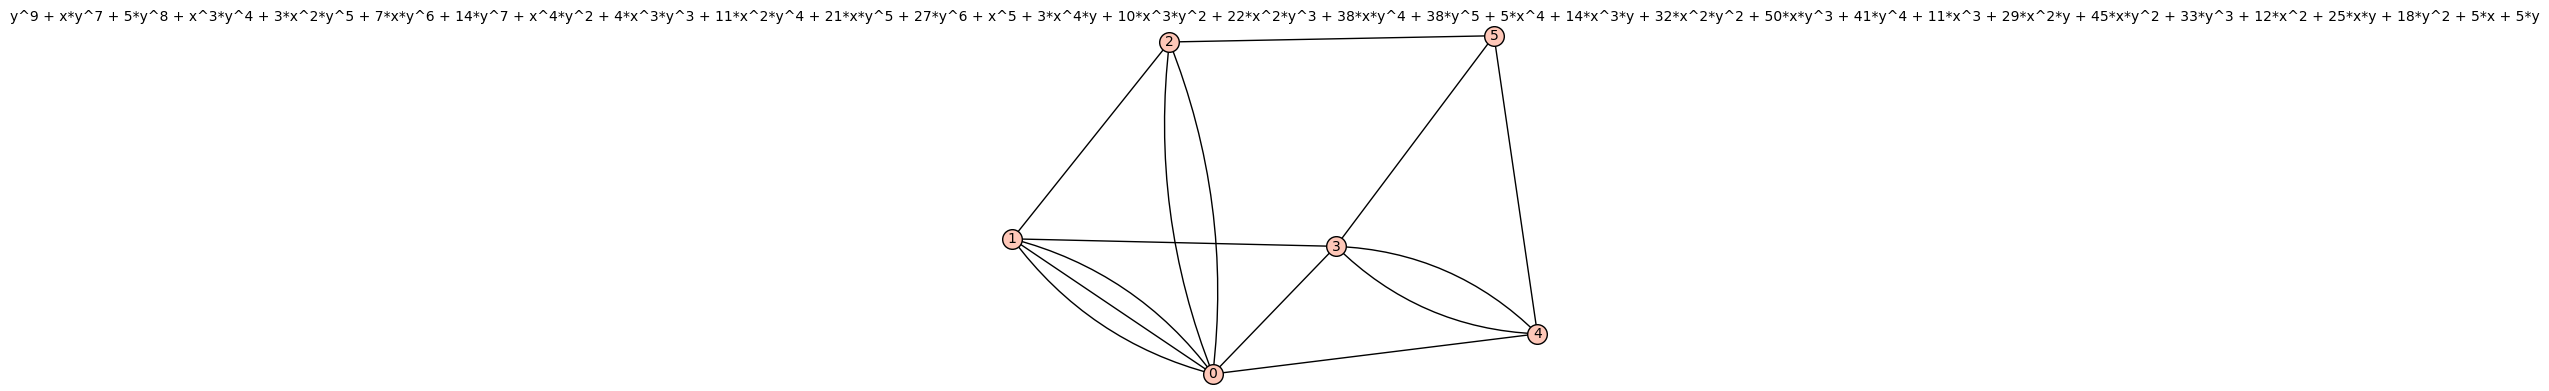

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (2, 6), (2, 7), (3, 5), (4, 6), (5, 7)]
non-unique with 2 cut but no whiney twist
U????B?oD?S?c?S?P?AO?`??S?@C??S??`??@O??


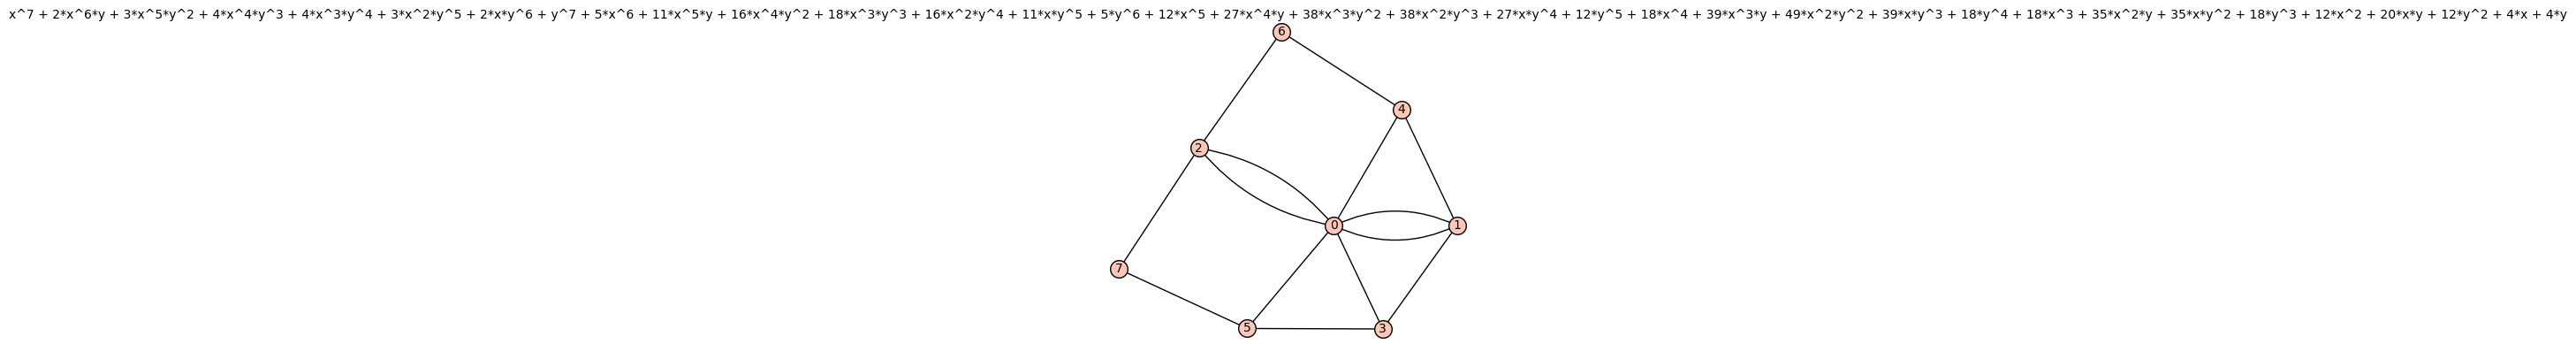

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 6), (2, 4), (2, 6), (3, 5), (4, 7), (5, 7)]
non-unique with 2 cut but no whiney twist
U????B?oD?S?c?S?P?@O?`??S?AC?@C??H??@O??


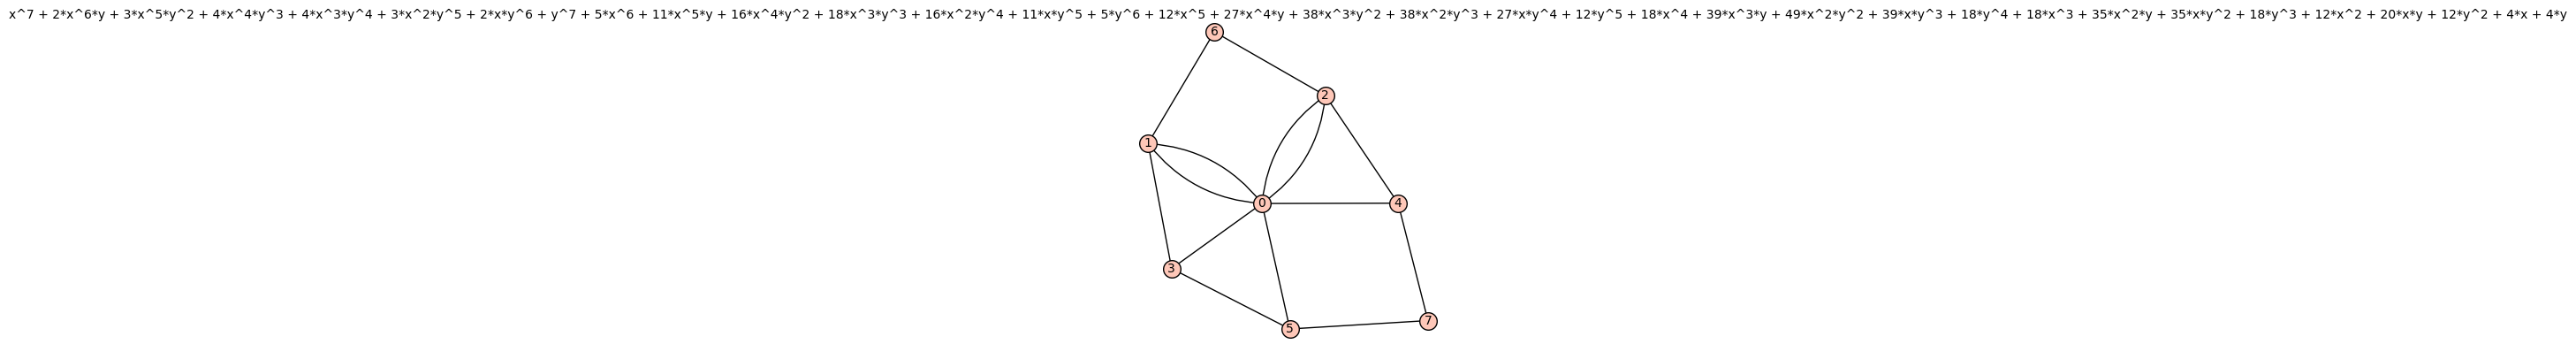

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (0, 4), (1, 3), (1, 5), (2, 6), (2, 7), (3, 4), (4, 5), (4, 6), (5, 7)]
non-unique with 2 cut but no whiney twist
U????B?oD?S?c?S?P??o?P??K?@C??S??`??@O??


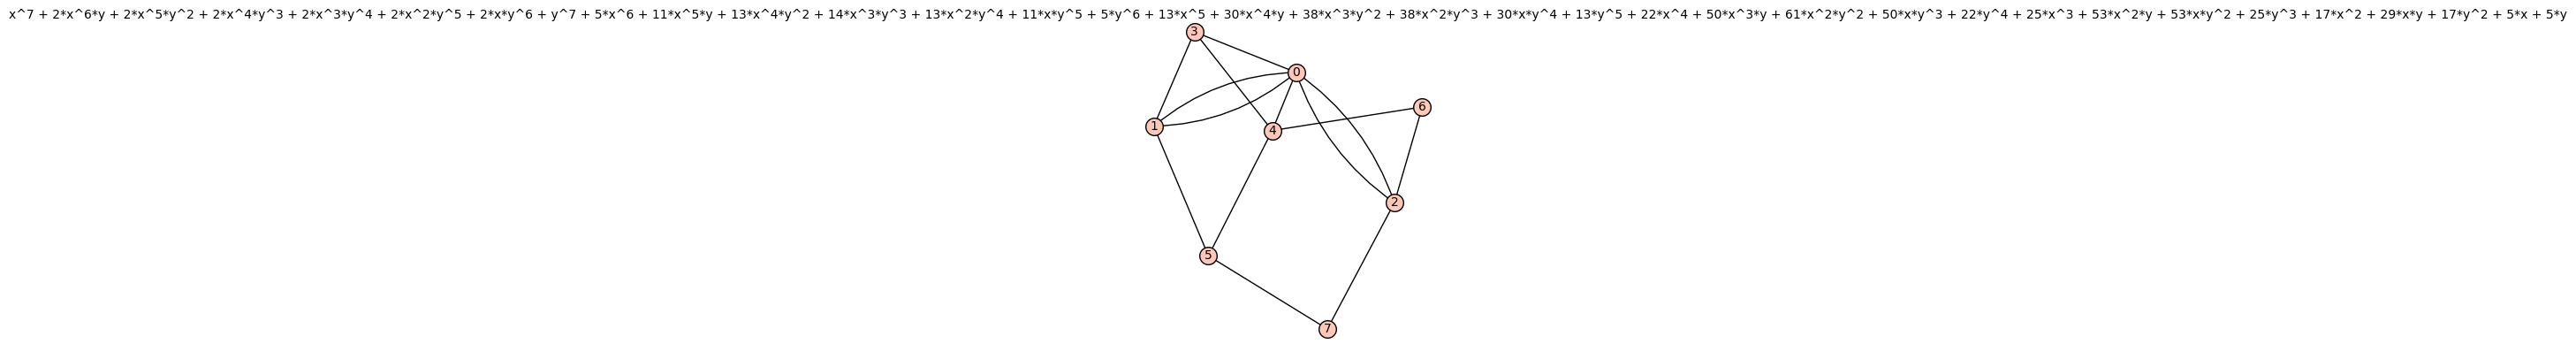

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5), (2, 3), (2, 6), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]
non-unique with 2 cut but no whiney twist
U????B?oD?K?c?K?P?AG?G_?I??K??Q??D???o??


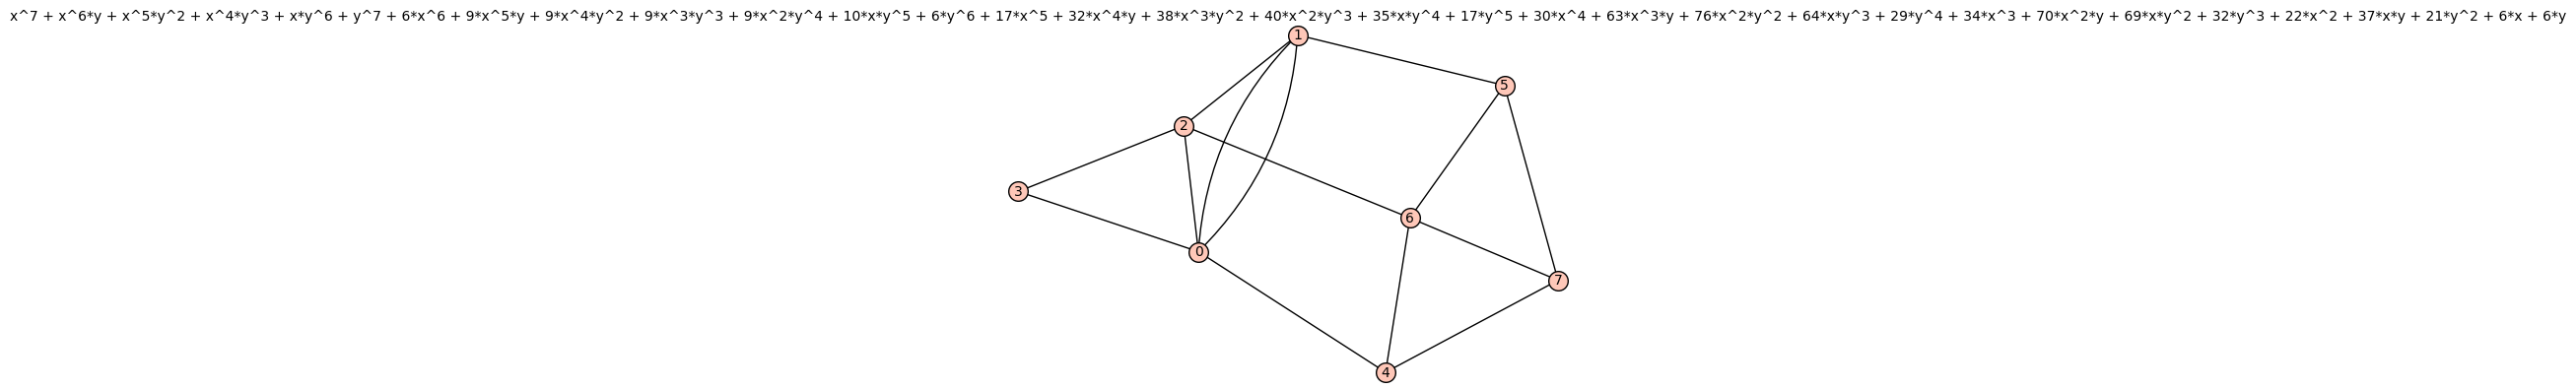

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5), (2, 6), (3, 4), (3, 4), (3, 5), (3, 7), (4, 6), (6, 7)]
non-unique with 2 cut but no whiney twist
U????B?oD?K?c?a?B??o?P??S?@C??S??P???o??


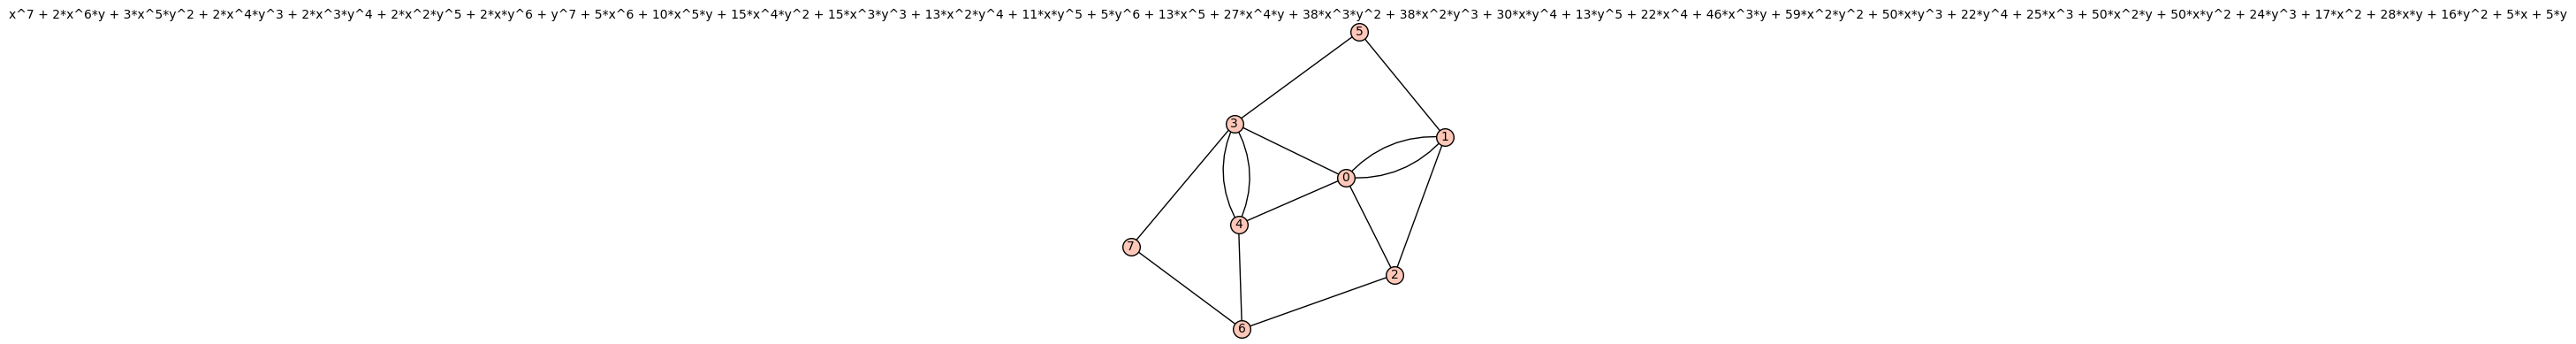

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5), (2, 6), (3, 5), (3, 7), (4, 5), (5, 7), (5, 7), (6, 7)]
non-unique with 2 cut but no whiney twist
U????B?oD?K?c?a?G_?g?B??a??a??I??D???o??


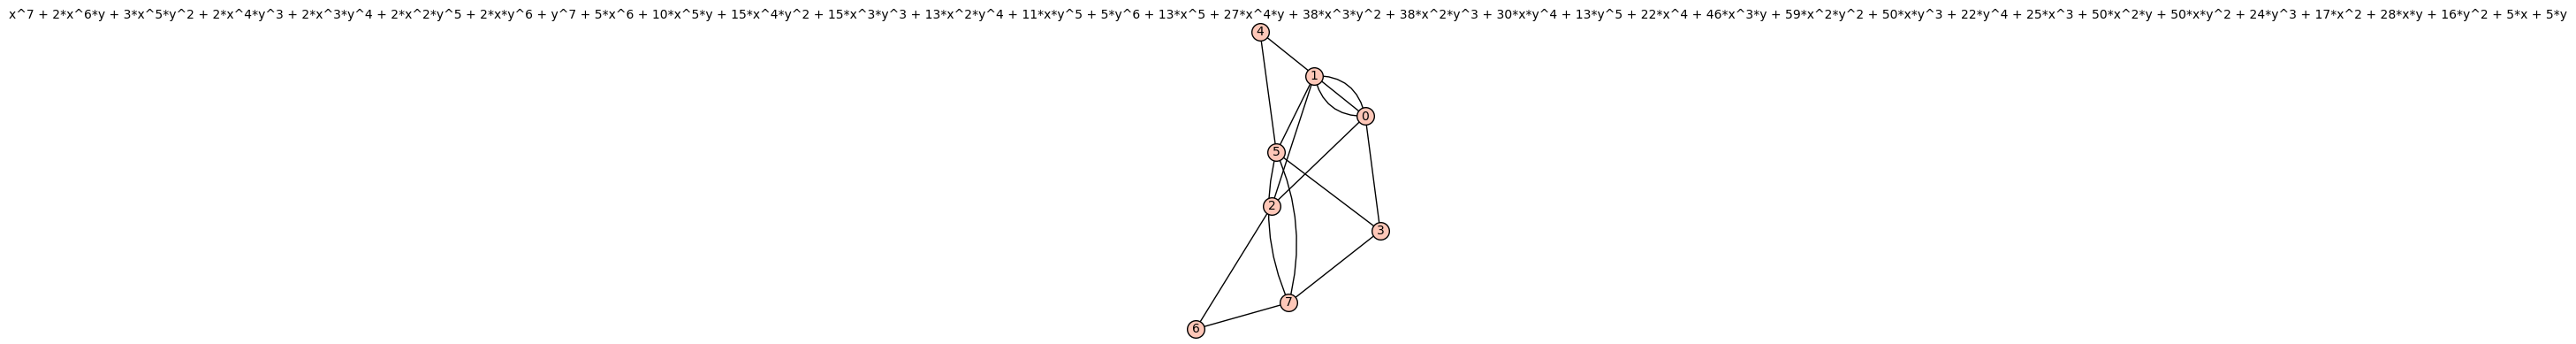

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5), (2, 6), (3, 5), (3, 6), (3, 7), (4, 6), (5, 6), (6, 7)]
non-unique with 2 cut but no whiney twist
U????B?oD?K?c?a?G_?g?G_?Q??S??K??P???o??


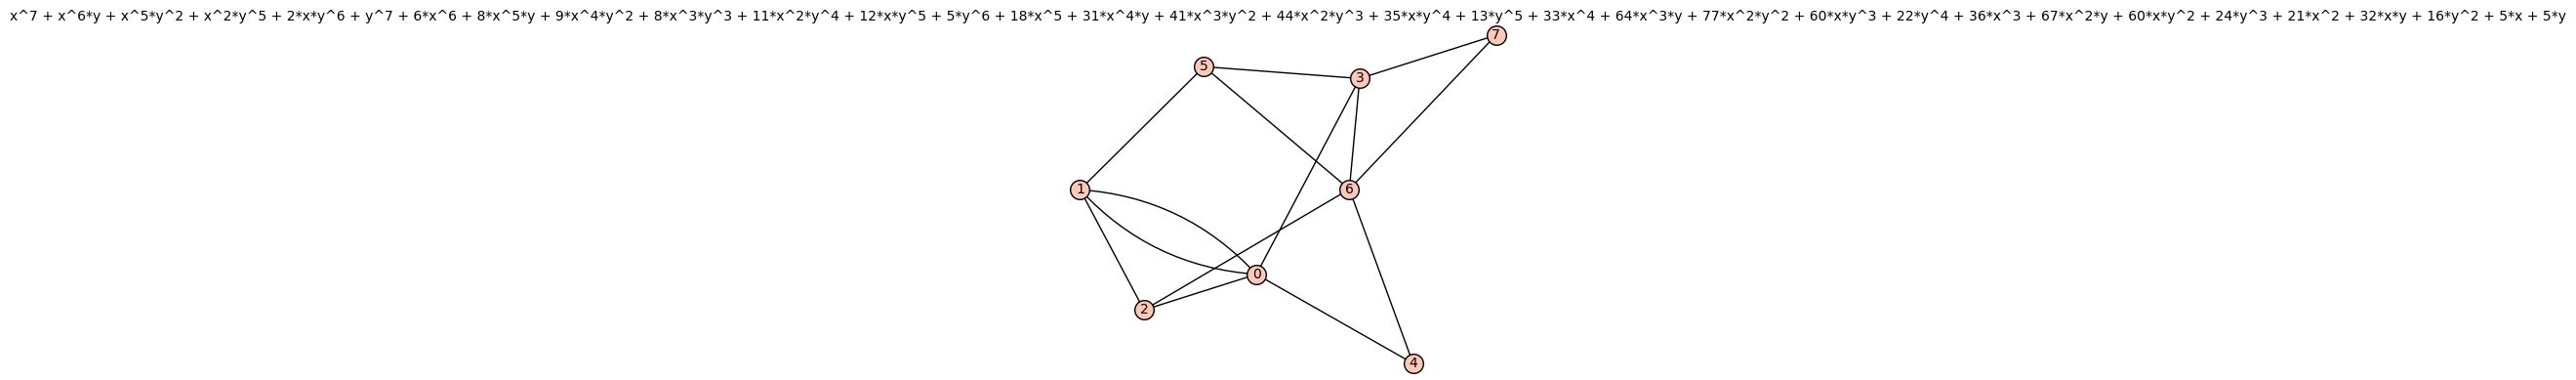

____________________
connectivity=2
Edges: [(0, 1), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 6), (2, 7), (3, 4), (3, 6), (3, 8), (4, 7), (5, 8)]
non-unique with 2 cut but no whiney twist
V??????oE?S?W?c?P??o?`?@A??c?@A??H??CG??H???


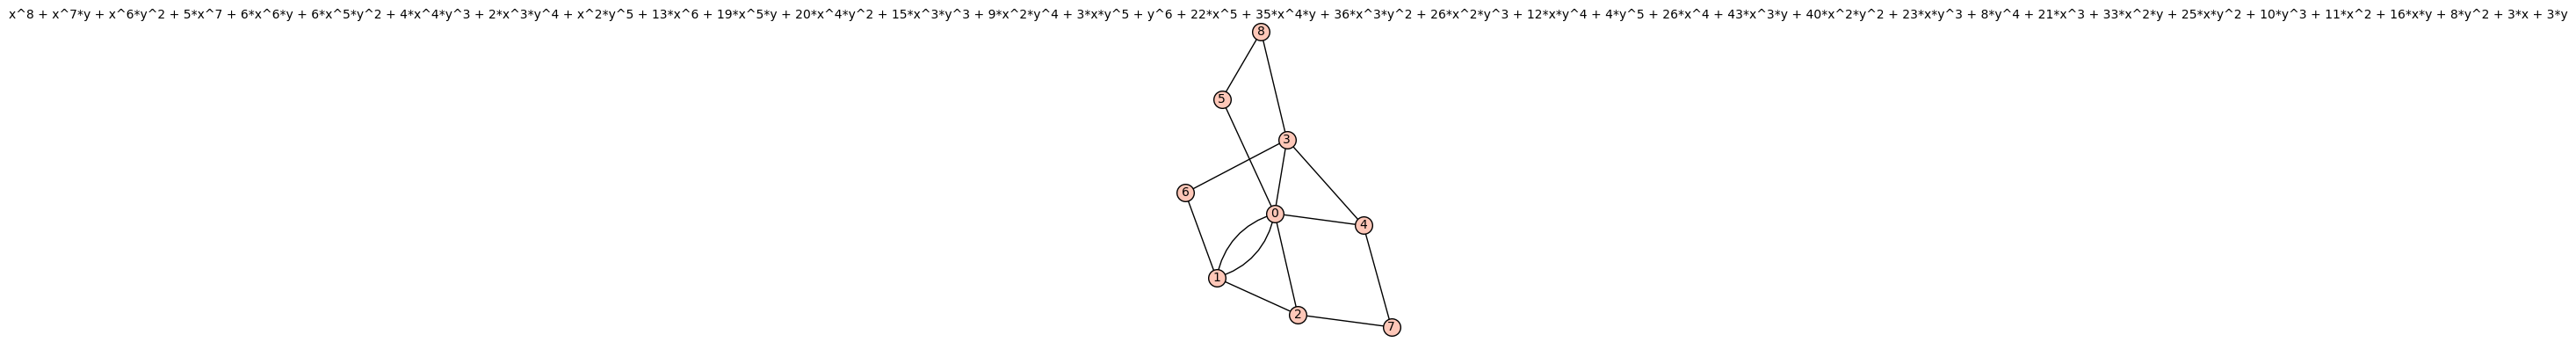

____________________
connectivity=2
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 7), (2, 8), (4, 7), (4, 8), (5, 8), (6, 8)]
non-unique with 2 cut but no whiney twist
V??????oD?K?c?S?P?CG?__@@??Q?@@??G_?@G??D???


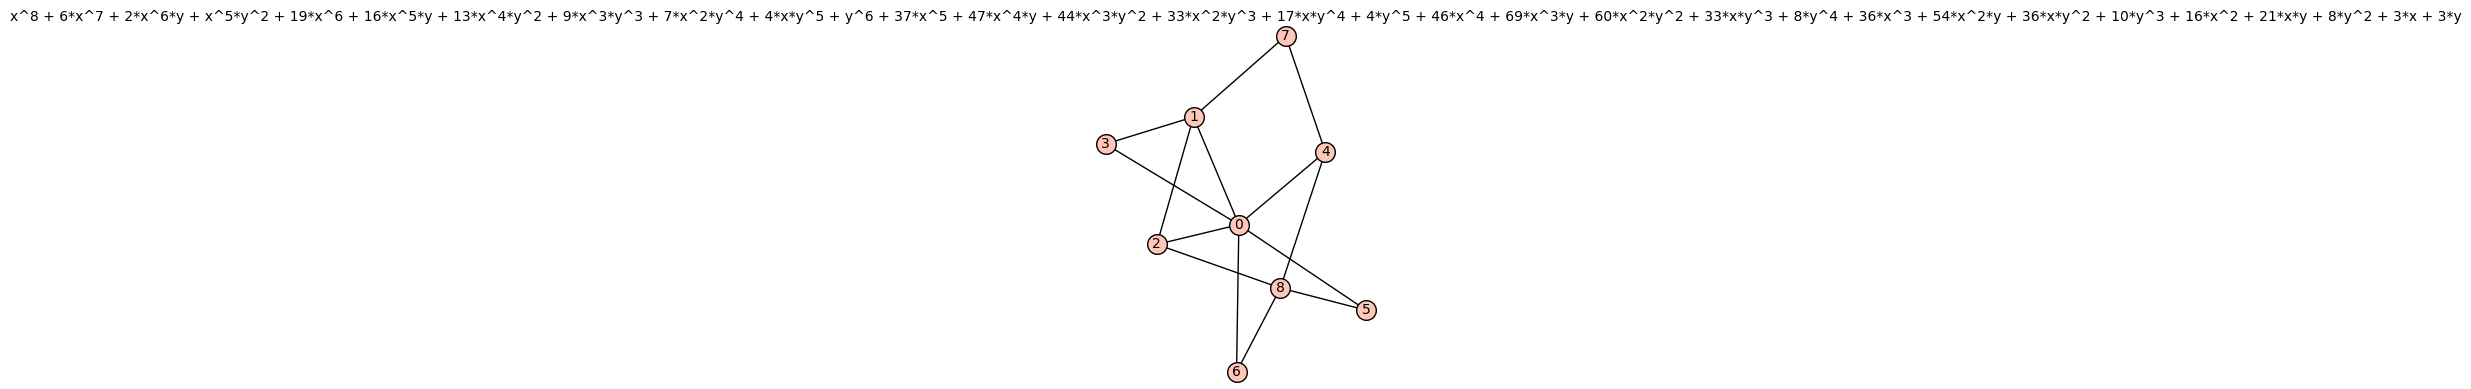

____________________
connectivity=2
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (2, 6), (3, 7), (4, 6), (5, 8), (6, 9), (7, 8), (7, 9)]
non-unique with 2 cut but no whiney twist
W???????E?S?W?c?I?CO?`??a??S??a??C_??W??C_??I??


In [ ]:
n_one_connected = 0
n_twist = 0
for g6, cnct, label in result:
    print(f"connectivity={cnct}")
    print("Edges:", g6ToMultigraph(g6).edges(labels=False))
    print(labels_d[label])
    plotGraphsFromG6([g6])
    if label==ONE_CUT:
        n_one_connected += 1
    elif label==TWO_CUT_TWST:
        n_twist += 1
    print("_"*20)

In [10]:
n_one_connected, n_twist

(1, 2)